# **The Sparks Foundation Internship**

### **Author : Mahesh Narayankar**



### **Prediction using Unsupervised ML**

# **Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually**

**Step 1 : Import Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

**Step 2 : Importing dataset**

In [7]:
dataset = pd.read_csv('/content/Iris.csv')
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Srep 3 : Feature Extraction**

In [13]:
x = dataset.iloc[ : , 1:5].values

X = pd.DataFrame({'Sepal_Length' : x[0],'Sepal_Width' : x[1], 'Petal_Length' : x[2],'Petal_Width' : x[3]})
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,4.9,4.7,4.6
1,3.5,3.0,3.2,3.1
2,1.4,1.4,1.3,1.5
3,0.2,0.2,0.2,0.2


**Step 4 : Finding Optimal no. of Clusters using Elbow Method**

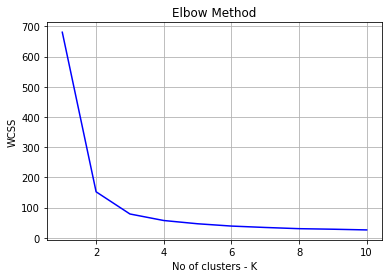

In [17]:
from sklearn.cluster import KMeans

wcss = [] 
for i in range(1,11) : 
  kmeans = KMeans(n_clusters = i , init = 'k-means++' ,random_state = 1 )
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) 

plt.plot(range(1,11),wcss,color = 'blue')
plt.title('Elbow Method')
plt.xlabel('No of clusters - K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## From graph we can conclude that Optimal Number of cluster should be K=3

**Step 5 : Training KMeans Model**

In [23]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++' , random_state = 1)
y_kmeans = kmeans.fit_predict(x)

In [24]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


**Step 6 : Visualizing Model**

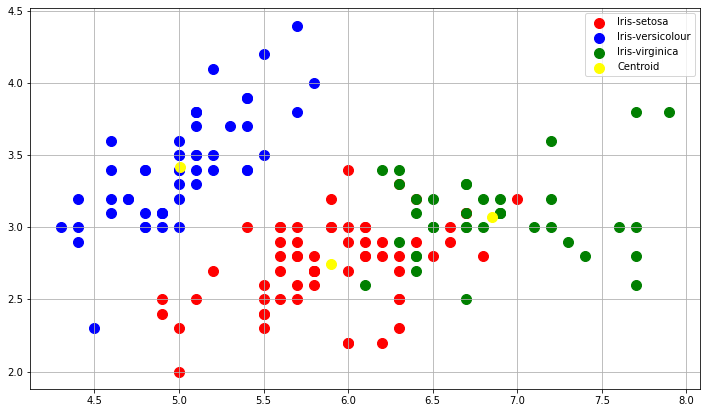

In [57]:
plt.figure(figsize = [12,7])

plt.scatter(x[y_kmeans == 0 , 0] , x[y_kmeans == 0 , 1], s = 100 , color = 'red' , label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1 , 0] , x[y_kmeans == 1 , 1], s = 100 , color = 'blue' , label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2 , 0] , x[y_kmeans == 2 , 1], s = 100 , color = 'green' , label = 'Iris-virginica')


#Plotting Centroid

plt.scatter(kmeans.cluster_centers_[ : ,0], kmeans.cluster_centers_[ : , 1], s = 100 , color = 'yellow' , label = 'Centroid')

plt.grid(True)
plt.legend()